# Loading an RC from Matlab into Python
We load a previously saved RCpoints from Matlab into point for later manipulation as tensor.

**structure of a RCPoint**
* Lead -> implanted lead
* Position -> repositioning ID from during surgery
* Electrode -> 0-based electrode numbering
* Amp -> stimulation amp
* EMGs_filt -> filtered EMG responses
* NormConsts -> normalization constants that were used based on maximal responses
* muscle -> median of peak-to-peak of responses (real value if only one pulse at this amplitude)
* muscle_all -> all peak-to-peaks for the responses at same amplitude

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
%matplotlib inline

Loading the file

In [3]:
mat_contents = sio.loadmat('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/filtered_objects/RCPoints_MR012_subset.mat',squeeze_me=True)

In [4]:
print(type(mat_contents['subsetRC']))
subset_array=mat_contents['subsetRC']

<class 'numpy.ndarray'>


In [5]:
print(np.shape(subset_array))

(118,)


In [6]:
n_cells=len(subset_array)

In [7]:
# Cells are trials
n_trials=n_cells

In [8]:
# We load 1 cell and go all the way to get the key names.
i_cell = 0 
cell_i=subset_array[i_cell]
keys_cell_i = cell_i.dtype.names
print("keys_cell_i",keys_cell_i)
n_keys_cell_i=len(keys_cell_i)
print("n_keys_cell_i",n_keys_cell_i)

keys_cell_i ('Lead', 'Position', 'Electrode', 'Amp', 'EMGs_filt', 'NormConsts', 'LIL', 'LIL_all', 'RIL', 'RIL_all', 'LRF', 'LRF_all', 'RRF', 'RRF_all', 'LVL', 'LVL_all', 'RVL', 'RVL_all', 'LST', 'LST_all', 'RST', 'RST_all', 'LTA', 'LTA_all', 'RTA', 'RTA_all', 'LMG', 'LMG_all', 'RMG', 'RMG_all', 'LSOL', 'LSOL_all', 'RSOL', 'RSOL_all', 'LPS', 'LPS_all', 'RPS', 'RPS_all', 'RHIPF', 'LHIPF', 'RKNEX', 'LKNEX', 'RANKF', 'LANKF', 'RANKX', 'LANKX')
n_keys_cell_i 46


In [9]:
# Let's declare the keys independently so that it becomes easier to go through them
key_lead=keys_cell_i[0]
key_position=keys_cell_i[1]
key_electrode=keys_cell_i[2]
key_amplitude=keys_cell_i[3]
key_emg_time_series=keys_cell_i[4]
key_normalization_constants_list=keys_cell_i[5]
indices_median_peak2peak=np.arange(6,38,2)
indices_median_peak2peak=indices_median_peak2peak.astype(int)
keys_median_peak2peak_muscle=[keys_cell_i[index] for index in indices_median_peak2peak]
indices_all_peak2peak=np.arange(7,39,2)
indices_all_peak2peak=indices_all_peak2peak.astype(int)
keys_all_peak2peak_muscle=[keys_cell_i[index] for index in indices_all_peak2peak]
indices_movements_peak2peak=np.arange(38,46,1)
indices_movements_peak2peak=indices_movements_peak2peak.astype(int)
keys_movements_peak2peak_muscle=[keys_cell_i[index] for index in indices_movements_peak2peak]
n_movements_peak2peak_muscle=len(keys_movements_peak2peak_muscle)

In [10]:
# Now let's open up a EMG time serie struct array and take the keys
emg_filt_time_series_cell_i=cell_i[key_emg_time_series].item()
keys_emg_filt_time_serie_cell_i = emg_filt_time_series_cell_i.dtype.names
print("keys_emg_filt_time_serie_cell_i",keys_emg_filt_time_serie_cell_i)
n_keys_emg_filt_time_serie_cell_i=len(keys_emg_filt_time_serie_cell_i)
print("n_keys_emg_filt_time_serie_cell_i",n_keys_emg_filt_time_serie_cell_i)

keys_emg_filt_time_serie_cell_i ('LIL', 'RIL', 'LRF', 'RRF', 'LVL', 'RVL', 'LST', 'RST', 'LTA', 'RTA', 'LMG', 'RMG', 'LSOL', 'RSOL', 'LPS', 'RPS')
n_keys_emg_filt_time_serie_cell_i 16


In [11]:
# Now let's open up a normalization constants serie struct array and take the keys
normalization_constants_list_cell_i=cell_i[key_normalization_constants_list].item()
keys_normalization_constants_list_cell_i = normalization_constants_list_cell_i.dtype.names
print("keys_normalization_constants_list_cell_i",keys_normalization_constants_list_cell_i)
n_keys_normalization_constants_list_cell_i=len(keys_normalization_constants_list_cell_i)
print("n_keys_emg_filt_time_serie_cell_i",n_keys_normalization_constants_list_cell_i)

keys_normalization_constants_list_cell_i ('LIL', 'RIL', 'LRF', 'RRF', 'LVL', 'RVL', 'LST', 'RST', 'LTA', 'RTA', 'LMG', 'RMG', 'LSOL', 'RSOL', 'LPS', 'RPS')
n_keys_emg_filt_time_serie_cell_i 16


The keys from the EMG filt time serie, the list of the normalization constants and the keys_median_peak2peak_muscle seem to be the list of muscles (16 muscles) and they are identical. The keys_all_peak2peak_muscle have an \_all appendend to each muscle name.

In [12]:
# Getting a specific EMG filt time serie
j_muscle_EMG_filt_time_serie_cell_i=0
key_muscle_j_EMG_filt_time_serie_cell_i=keys_emg_filt_time_serie_cell_i[j_muscle_EMG_filt_time_serie_cell_i]
print("key_muscle_j_EMG_filt_time_serie_cell_i",key_muscle_j_EMG_filt_time_serie_cell_i)
muscle_j_EMG_filt_time_serie_cell_i=emg_filt_time_series_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()

key_muscle_j_EMG_filt_time_serie_cell_i LIL


<function matplotlib.pyplot.show(close=None, block=None)>

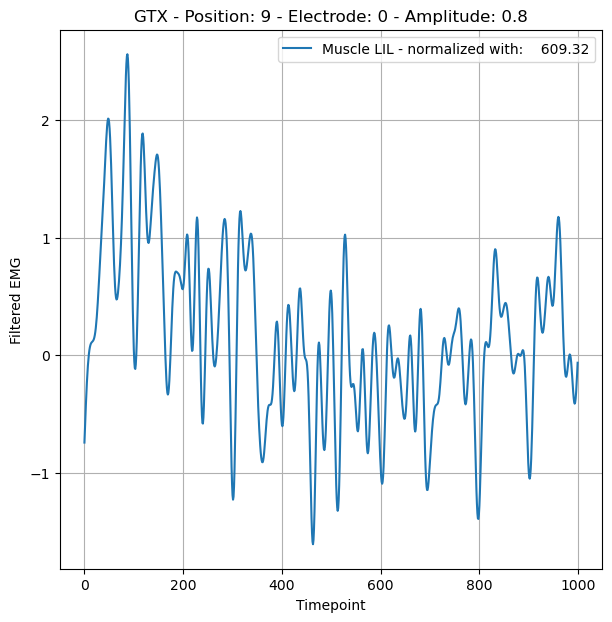

In [13]:
lead_cell_i=cell_i[key_lead].item()
position_cell_i=cell_i[key_position].item()
electrode_cell_i=cell_i[key_electrode].item()
amplitude_cell_i=cell_i[key_amplitude].item()
key_muscle_j_EMG_filt_time_serie_cell_i=key_muscle_j_EMG_filt_time_serie_cell_i
normalization_constant_muscle_j_cell_i=normalization_constants_list_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()
title_string=lead_cell_i+' - Position: '+str(position_cell_i)+' - Electrode: '+str(electrode_cell_i)+' - Amplitude: '+str(amplitude_cell_i)
label_string="Muscle "+key_muscle_j_EMG_filt_time_serie_cell_i+' - normalized with:'+"{:10.2f}".format(normalization_constant_muscle_j_cell_i)
fig = plt.figure(figsize=(7,7))
plt.plot(muscle_j_EMG_filt_time_serie_cell_i,label=label_string)
plt.legend()
plt.xlabel("Timepoint")
plt.ylabel("Filtered EMG")
plt.title(title_string)
plt.grid()
plt.show

In [14]:
# Getting the peak to peak saved values for all muscles
median_peak2peak_muscles_cell_i=cell_i[keys_median_peak2peak_muscle]
median_peak2peak_muscle_j_cell_i=median_peak2peak_muscles_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()

In [15]:
# Getting the all peak to peak for this particular muscle
key_muscle_j_EMG_filt_time_serie_cell_i_all=key_muscle_j_EMG_filt_time_serie_cell_i+"_all"
all_peak2peak_muscles_cell_i=cell_i[keys_all_peak2peak_muscle]
all_peak2peak_muscle_j_cell_i=all_peak2peak_muscles_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i_all].item()

In [16]:
# For the movements let us keep them everywhere since we have little info about them so far
movements_peak2peak_muscle_cell_i=cell_i[keys_movements_peak2peak_muscle]
for k_movement in range(n_movements_peak2peak_muscle):
    key_movement_k_peak2peak_cell_i=keys_movements_peak2peak_muscle[k_movement]
    movement_k_peak2peak_cell_i=movements_peak2peak_muscle_cell_i[key_movement_k_peak2peak_cell_i].item()
    print(key_movement_k_peak2peak_cell_i,movement_k_peak2peak_cell_i)

RHIPF 0
LHIPF 0.0013617759254060818
RKNEX 0
LKNEX 0
RANKF 0
LANKF 0.010011336169537617
RANKX 0
LANKX 0


### Data frame construction

Now let us build a dataframe with all the data for later processing.

In [17]:
verbose=1
subject = 'MR012'

In [18]:
n_rows_to_display = 5
pd.set_option('display.max_rows', n_rows_to_display)

In [19]:
list_elec_config_dfs = []
if verbose:
    print("Loading data of subject:",subject)
for i_cell in range(n_cells):
    if verbose:
        print("Loading cell: ",i_cell)
    cell_i=subset_array[i_cell]
    keys_cell_i = cell_i.dtype.names
    if verbose>2:
        print("keys_cell_i",keys_cell_i)
    n_keys_cell_i=len(keys_cell_i)
    if verbose>2:
        print("n_keys_cell_i",n_keys_cell_i)
    # Getting the info with the previously extracted keys
    lead_cell_i=cell_i[key_lead].item()
    position_cell_i=cell_i[key_position].item()
    electrode_cell_i=cell_i[key_electrode].item()
    amplitude_cell_i=cell_i[key_amplitude].item()
    # Lists
    median_peak2peak_muscles_cell_i=cell_i[keys_median_peak2peak_muscle]
    all_peak2peak_muscles_cell_i=cell_i[keys_all_peak2peak_muscle]
    movements_peak2peak_muscle_cell_i=cell_i[keys_movements_peak2peak_muscle]
    # Structured arrays with arrays inside
    emg_filt_time_series_cell_i=cell_i[key_emg_time_series].item()
    normalization_constants_list_cell_i=cell_i[key_normalization_constants_list].item()
    # Getting time series
    for j_muscle_EMG_filt_time_serie_cell_i in range(n_keys_emg_filt_time_serie_cell_i):
        key_muscle_j_EMG_filt_time_serie_cell_i=keys_emg_filt_time_serie_cell_i[j_muscle_EMG_filt_time_serie_cell_i]
        key_muscle_j_EMG_filt_time_serie_cell_i_all=key_muscle_j_EMG_filt_time_serie_cell_i+"_all"
        median_peak2peak_muscle_j_cell_i=median_peak2peak_muscles_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()
        all_peak2peak_muscle_j_cell_i=all_peak2peak_muscles_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i_all].item()
        if verbose: 
            print("Muscle",key_muscle_j_EMG_filt_time_serie_cell_i)
        muscle_j_EMG_filt_time_serie_cell_i=emg_filt_time_series_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()
        n_time_points_trial=len(muscle_j_EMG_filt_time_serie_cell_i)
        normalization_constant_muscle_j_cell_i=normalization_constants_list_cell_i[key_muscle_j_EMG_filt_time_serie_cell_i].item()
        # Creating the dataframe
        df_trial_muscle_and_other_i_data = pd.DataFrame(data=[[muscle_j_EMG_filt_time_serie_cell_i]],columns=[key_emg_time_series])
        df_trial_muscle_and_other_i_data['Time_points'] = n_time_points_trial
        df_trial_muscle_and_other_i_data['Muscle'] = key_muscle_j_EMG_filt_time_serie_cell_i
        df_trial_muscle_and_other_i_data['Elec_config'] = electrode_cell_i
        df_trial_muscle_and_other_i_data['Subject'] = subject
        df_trial_muscle_and_other_i_data['Amplitudes'] = amplitude_cell_i
        df_trial_muscle_and_other_i_data['Lead'] = lead_cell_i
        df_trial_muscle_and_other_i_data['Position'] = position_cell_i
        df_trial_muscle_and_other_i_data['Normalization_Constant'] = normalization_constant_muscle_j_cell_i
        df_trial_muscle_and_other_i_data['Median_Peak2Peak'] = median_peak2peak_muscle_j_cell_i
        df_trial_muscle_and_other_i_data['All_Peak2Peak'] = [all_peak2peak_muscle_j_cell_i]
        # filling the movements
        for k_movement in range(n_movements_peak2peak_muscle):
            key_movement_k_peak2peak_cell_i=keys_movements_peak2peak_muscle[k_movement]
            movement_k_peak2peak_cell_i=movements_peak2peak_muscle_cell_i[key_movement_k_peak2peak_cell_i].item()
            df_trial_muscle_and_other_i_data[key_movement_k_peak2peak_cell_i] = movement_k_peak2peak_cell_i
            if verbose>1:
                print(key_movement_k_peak2peak_cell_i,movement_k_peak2peak_cell_i)
        list_elec_config_dfs.append(df_trial_muscle_and_other_i_data)
if len(list_elec_config_dfs)>0:
    df_subject = pd.concat(list_elec_config_dfs, ignore_index=True)
    df_subject.reset_index(inplace=True)        

Loading data of subject: MR012
Loading cell:  0
Muscle LIL
Muscle RIL
Muscle LRF
Muscle RRF
Muscle LVL
Muscle RVL
Muscle LST
Muscle RST
Muscle LTA
Muscle RTA
Muscle LMG
Muscle RMG
Muscle LSOL
Muscle RSOL
Muscle LPS
Muscle RPS
Loading cell:  1
Muscle LIL
Muscle RIL
Muscle LRF
Muscle RRF
Muscle LVL
Muscle RVL
Muscle LST
Muscle RST
Muscle LTA
Muscle RTA
Muscle LMG
Muscle RMG
Muscle LSOL
Muscle RSOL
Muscle LPS
Muscle RPS
Loading cell:  2
Muscle LIL
Muscle RIL
Muscle LRF
Muscle RRF
Muscle LVL
Muscle RVL
Muscle LST
Muscle RST
Muscle LTA
Muscle RTA
Muscle LMG
Muscle RMG
Muscle LSOL
Muscle RSOL
Muscle LPS
Muscle RPS
Loading cell:  3
Muscle LIL
Muscle RIL
Muscle LRF
Muscle RRF
Muscle LVL
Muscle RVL
Muscle LST
Muscle RST
Muscle LTA
Muscle RTA
Muscle LMG
Muscle RMG
Muscle LSOL
Muscle RSOL
Muscle LPS
Muscle RPS
Loading cell:  4
Muscle LIL
Muscle RIL
Muscle LRF
Muscle RRF
Muscle LVL
Muscle RVL
Muscle LST
Muscle RST
Muscle LTA
Muscle RTA
Muscle LMG
Muscle RMG
Muscle LSOL
Muscle RSOL
Muscle LPS
Muscl

In [20]:
df_subject

,index,EMGs_filt,Time_points,Muscle,Elec_config,Subject,Amplitudes,Lead,Position,Normalization_Constant,Median_Peak2Peak,All_Peak2Peak,RHIPF,LHIPF,RKNEX,LKNEX,RANKF,LANKF,RANKX,LANKX
0,0,"[-0.742654377378546, -0.6295050482970883, -0.5...",1000,LIL,0,MR012,0.8,GTX,9,609.321256,0.004894,0.004894,0.0,0.001362,0.0,0.0,0.0,0.010011,0.0,0.0
1,1,"[-0.6024517822606961, -0.8947505520823424, -1....",1000,RIL,0,MR012,0.8,GTX,9,302.683729,0.006575,0.006575,0.0,0.001362,0.0,0.0,0.0,0.010011,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1886,"[[1.729454472030046, 1.529703103955608, 1.3218...",3,LPS,15,MR012,2.2,GTX,9,28877.795971,0.003364,"[0.003438002148152173, 0.003364165517816386, 0...",0.0,0.405764,0.0,0.0,0.0,0.024630,0.0,0.0
1887,1887,"[[-1.4996779499294728, -1.7862431622892607, -2...",3,RPS,15,MR012,2.2,GTX,9,23614.819066,0.000749,"[0.0007012845410548528, 0.0008706895981135599,...",0.0,0.405764,0.0,0.0,0.0,0.024630,0.0,0.0


In [21]:
list_elecs = df_subject['Elec_config'].unique() #Elec01_, Elec02_, Elec03_, 
n_list_elecs = len(list_elecs) 
list_muscle_or_other_elec_i = df_subject['Muscle'].unique() #LVlat, LST, ..
n_muscle_or_other_elec_i = len(list_muscle_or_other_elec_i)
list_elec_i_a_muslce_i=[]

# Restructure Data to a Class

in order to save it as pickle

In [22]:
#class to quicker acess the plots

#1. list of elec_muscle eg _1_6 each one will be one object (eg. same as when we graph the all the trials) 






class DfSubject:
    def __init__(self, elec_i, muscle_i):
        self.Elec_config=list_elecs[elec_i]
        self.List_elecs=list_elecs
        self.Muscle_or_other=list_muscle_or_other_elec_i[muscle_i]
        self.List_muscle_or_other=list_muscle_or_other_elec_i
        self.Trial_number= df_subject[(df_subject["Elec_config"]==self.Elec_config)& (df_subject["Muscle"]== self.Muscle_or_other)]["index"]
        self.Trial_number=[int(i) for i in self.Trial_number] #save as int
        self.filtered= df_subject[(df_subject["Elec_config"]==self.Elec_config)& (df_subject["Muscle"]== self.Muscle_or_other)]["EMGs_filt"]
        self.filtered.index=self.Trial_number
        
        self.Time_points= df_subject[(df_subject["Elec_config"]==self.Elec_config)& (df_subject["Muscle"]== self.Muscle_or_other)]["Time_points"]
        self.Time_points.index=self.Trial_number
        self.Amplitudes= df_subject[(df_subject["Elec_config"]==self.Elec_config)& (df_subject["Muscle"]== self.Muscle_or_other)]["Amplitudes"]
        self.Amplitudes.index=self.Trial_number
        
     


#4. Goal is to chose an electrode and a muscle and see all the trials and the corrected data        
#       eg. pData["_3_5"].Raw[19] #prints the raw data from trial 19

In [23]:
filteredData = {}
for elec_i in range(n_list_elecs):
    for muscle_i in range(n_muscle_or_other_elec_i):
        filteredData[f"_{elec_i}_{muscle_i}"] = DfSubject(elec_i, muscle_i)

# Save as a pickle file

In [27]:
### save files as pickle file  to projectome_finder#
#to run set run=1
run=0
if run == 1:
    import pickle
    fh = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/filteredData_dump.pkl', "wb")
    pickle.dump(filteredData, fh)
    fh.close()

# Retrieve Data from pickle

In [28]:
### retrieve  dfSubject structured as pData  #
#run the structure of the data before opening the pickle (wihtout creating an object)
# command pData["_0_"].Trial_number=0
import pickle
run=0
if run == 1:  

    with open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/filteredData_dump.pkl', 'rb') as handle:
        pData = pickle.load(handle)